In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\Abhishek\\Desktop\\Datasets\\Datasets\\Train'
valid_path = 'C:\\Users\\Abhishek\\Desktop\\Datasets\\Datasets\\Test'


resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False
folders = glob('C:\\Users\\Abhishek\\Desktop\\Datasets\\Datasets\\Train\\*')
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [3]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:\\Users\\Abhishek\\Desktop\\Datasets\\Datasets\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('C:\\Users\\Abhishek\\Desktop\\Datasets\\Datasets\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [4]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Abhishek\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 19s 5s/step - loss: 4.0717 - accuracy: 0.4062 - val_loss: 14.9858 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 2s 890ms/step - loss: 9.2932 - accuracy: 0.3438 - val_loss: 9.3746 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 2s 950ms/step - loss: 4.7999 - accuracy: 0.3906 - val_loss: 1.9881 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 3.0587 - accuracy: 0.3906 - val_loss: 2.7468 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 1.8506 - accuracy: 0.4375 - val_loss: 2.9227 - val_accuracy: 0.3448
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 2.1619 - accuracy: 0.5156 - val_loss: 4.1160 - val_accuracy: 0.3966
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 2.2219 - accuracy: 0.5625 - val_loss: 1.4490 - val_accuracy: 0.3621
Epoch 8/50
2/2 [=================

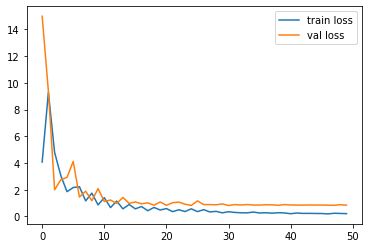

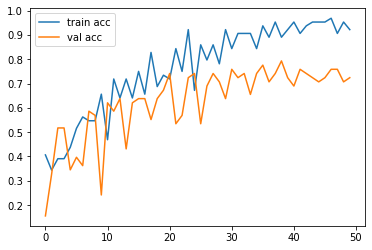

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [8]:
from tensorflow.keras.models import load_model

model.save('model.h5')

C:\Users\Abhishek\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [8]:
model=load_model('model.h5')
